In [1]:
import pandas as pd
import numpy as np
import datetime

## DATA PREPARATION

In [2]:
bookings = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/Booking_level_data.csv")

In [3]:
bookings.head()

,ACCOMMODATION_CODE,BOOKING_ID,BOOKING_STATUS,BOOKING_STATUS_DESCRIPTION,arrivaldate,departuredate,bookingdate,gbv,no_persons,no_child,no_adults
0,AT-5505-11,576245314,BOOKING,BOOKING,7/27/2019,8/3/2019,12/3/2018,2710.75,27,0,24
1,AT-5505-11,76234292,CANCELLED,CANCELLATION (NO PAYMENT),10/5/2019,10/12/2019,11/14/2018,0.00,19,10,9
2,AT-5505-11,1UHGKQGJ,BOOKING,BOOKING,10/5/2019,10/12/2019,8/21/2019,1839.04,23,12,11
3,AT-5505-11,776298327,CANCELLED,CANCELLATION WITHOUT INSURANCE,10/12/2019,10/19/2019,1/28/2019,567.00,24,17,7
4,AT-5541-33,76052288,BOOKING,BOOKING,3/2/2019,3/9/2019,3/7/2018,2288.59,19,6,11


In [4]:
bookings['arrivaldate'] = pd.to_datetime(bookings['arrivaldate'])
bookings['departuredate'] = pd.to_datetime(bookings['departuredate'])
bookings['bookingdate'] = pd.to_datetime(bookings['bookingdate'])

In [5]:
date_to_week = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/weeks_start_date.csv")

In [6]:
date_to_week

,YEAR,WEEK,WK_START
0,2017,20,2017-05-13
1,2017,21,2017-05-20
2,2017,22,2017-05-27
3,2017,23,2017-06-03
4,2017,24,2017-06-10
...,...,...,...
185,2020,49,2020-11-28
186,2020,50,2020-12-05
187,2020,51,2020-12-12
188,2020,52,2020-12-19


In [7]:
date_to_week['WK_START'] = pd.to_datetime(date_to_week['WK_START'])

In [8]:
date_to_week["WK_END"]= date_to_week["WK_START"] + datetime.timedelta(7)

In [9]:
date_to_week.head()

,YEAR,WEEK,WK_START,WK_END
0,2017,20,2017-05-13,2017-05-20
1,2017,21,2017-05-20,2017-05-27
2,2017,22,2017-05-27,2017-06-03
3,2017,23,2017-06-03,2017-06-10
4,2017,24,2017-06-10,2017-06-17


In [10]:
FR_bookings = bookings[(bookings["ACCOMMODATION_CODE"].str.contains("FR"))&(bookings["BOOKING_STATUS"]=="BOOKING")]

In [11]:
FR_bookings.head()

,ACCOMMODATION_CODE,BOOKING_ID,BOOKING_STATUS,BOOKING_STATUS_DESCRIPTION,arrivaldate,departuredate,bookingdate,gbv,no_persons,no_child,no_adults
5305,FR-00001-04,476075349,BOOKING,BOOKING,2018-06-08,2018-06-10,2018-04-07,1515.24,35,5,30
5306,FR-00003-87,476057861,BOOKING,BOOKING,2018-04-30,2018-05-07,2018-03-14,1658.67,17,6,10
5307,FR-00004-79,476010377,BOOKING,BOOKING,2018-07-14,2018-07-28,2018-01-21,13165.70,22,10,11
5308,FR-00004-79,376348744,BOOKING,BOOKING,2019-07-27,2019-08-03,2019-03-24,5807.25,28,7,16
5309,FR-00011-25,576237891,BOOKING,BOOKING,2019-07-06,2019-07-13,2018-11-20,3486.57,17,0,16


In [ ]:
# Create a day wise booking dataframe. Converts booking level data into day wise. 
day_wise_bookings = pd.DataFrame(columns=["ACCOMMODATION_CODE", "BOOKING_ID", "arrivaldate", "departuredate","bookingdate", "date", "revenue"])
count = 0
for booking in FR_bookings.values:
    if(count%10000==0):
        print(count)
    count+= 1
    days_of_booking = int(((booking[5]-booking[4]) / np.timedelta64(1, 'D')))
    rev_per_day = booking[7]/days_of_booking
    for i in range(days_of_booking):
        date = booking[4] + datetime.timedelta(i)
        booking_df = pd.DataFrame([(booking[0], booking[1], booking[4], booking[5], booking[6], date, rev_per_day)], columns=["ACCOMMODATION_CODE", "BOOKING_ID", "arrivaldate", "departuredate","bookingdate", "date", "revenue"])
        day_wise_bookings = day_wise_bookings.append(booking_df)

0
10000
20000


In [23]:
day_wise_bookings = day_wise_bookings.reset_index().drop(["index"], axis=1)

In [24]:
day_wise_bookings

,ACCOMMODATION_CODE,BOOKING_ID,arrivaldate,departuredate,bookingdate,date,revenue
0,FR-00001-04,476075349,2018-06-08,2018-06-10,2018-04-07,2018-06-08,757.620000
1,FR-00001-04,476075349,2018-06-08,2018-06-10,2018-04-07,2018-06-09,757.620000
2,FR-00003-87,476057861,2018-04-30,2018-05-07,2018-03-14,2018-04-30,236.952857
3,FR-00003-87,476057861,2018-04-30,2018-05-07,2018-03-14,2018-05-01,236.952857
4,FR-00003-87,476057861,2018-04-30,2018-05-07,2018-03-14,2018-05-02,236.952857
...,...,...,...,...,...,...,...
278349,FR-88160-10,276250486,2019-06-22,2019-06-29,2018-12-12,2019-06-24,148.970000
278350,FR-88160-10,276250486,2019-06-22,2019-06-29,2018-12-12,2019-06-25,148.970000
278351,FR-88160-10,276250486,2019-06-22,2019-06-29,2018-12-12,2019-06-26,148.970000
278352,FR-88160-10,276250486,2019-06-22,2019-06-29,2018-12-12,2019-06-27,148.970000


In [25]:
# Create day wise week dataframe. Converts week level dates to each date 
day_wise_week = pd.DataFrame(columns=["year", "week", "week_start", "week_end","date"])
count = 0
for week in date_to_week.values:
    if(count%365==0):
        print(count)
    days_of_booking = int(((week[3]-week[2]) / np.timedelta64(1, 'D')))
#     rev_per_day = booking[7]/days_of_booking
    for i in range(days_of_booking):
        count+= 1
        date = week[2] + datetime.timedelta(i)
        week_df = pd.DataFrame([(week[0], week[1], week[2], week[3], date)], columns=["year", "week", "week_start", "week_end","date"])
        day_wise_week = day_wise_week.append(week_df)

0


In [26]:
day_wise_week

,year,week,week_start,week_end,date
0,2017,20,2017-05-13,2017-05-20,2017-05-13
0,2017,20,2017-05-13,2017-05-20,2017-05-14
0,2017,20,2017-05-13,2017-05-20,2017-05-15
0,2017,20,2017-05-13,2017-05-20,2017-05-16
0,2017,20,2017-05-13,2017-05-20,2017-05-17
...,...,...,...,...,...
0,2020,53,2020-12-26,2021-01-02,2020-12-28
0,2020,53,2020-12-26,2021-01-02,2020-12-29
0,2020,53,2020-12-26,2021-01-02,2020-12-30
0,2020,53,2020-12-26,2021-01-02,2020-12-31


In [27]:
day_wise_week = day_wise_week.reset_index().drop(["index"], axis=1)

In [28]:
day_wise_week

,year,week,week_start,week_end,date
0,2017,20,2017-05-13,2017-05-20,2017-05-13
1,2017,20,2017-05-13,2017-05-20,2017-05-14
2,2017,20,2017-05-13,2017-05-20,2017-05-15
3,2017,20,2017-05-13,2017-05-20,2017-05-16
4,2017,20,2017-05-13,2017-05-20,2017-05-17
...,...,...,...,...,...
1325,2020,53,2020-12-26,2021-01-02,2020-12-28
1326,2020,53,2020-12-26,2021-01-02,2020-12-29
1327,2020,53,2020-12-26,2021-01-02,2020-12-30
1328,2020,53,2020-12-26,2021-01-02,2020-12-31


In [29]:
FR_day_wise_booking = day_wise_bookings.merge(day_wise_week, on="date", how="left")

In [10]:
FR_day_wise_booking

NameError: name 'FR_day_wise_booking' is not defined

In [38]:
FR_weekly_revenue = FR_day_wise_booking.groupby(["year","week","ACCOMMODATION_CODE"]).sum()

In [39]:
FR_weekly_revenue = FR_weekly_revenue.reset_index()

In [40]:
FR_weekly_revenue.head()

,year,week,ACCOMMODATION_CODE,revenue
0,2018,3,FR-05100-51,445.270
1,2018,3,FR-05250-41-01,423.280
2,2018,3,FR-06420-17-01,585.730
3,2018,3,FR-06537-01,458.740
4,2018,3,FR-08240-01,58.325


In [45]:
FR_occupancy = FR_day_wise_booking.groupby(["year","week","ACCOMMODATION_CODE"]).count()["date"]

In [46]:
FR_occupancy = FR_occupancy.reset_index()
FR_occupancy

,year,week,ACCOMMODATION_CODE,date
0,2018,3,FR-05100-51,7
1,2018,3,FR-05250-41-01,6
2,2018,3,FR-06420-17-01,4
3,2018,3,FR-06537-01,5
4,2018,3,FR-08240-01,1
...,...,...,...,...
44554,2020,2,FR-59132-13-01,2
44555,2020,2,FR-68140-03,1
44556,2020,2,FR-68910-01,7
44557,2020,2,FR-73570-01-01,7


In [47]:
FR_occupancy = FR_occupancy.rename(columns={"date":"no_days_booked"})

In [48]:
FR_occupancy["occupancy"] = FR_occupancy["no_days_booked"]/7

In [49]:
FR_occupancy.head()

,year,week,ACCOMMODATION_CODE,no_days_booked,occupancy
0,2018,3,FR-05100-51,7,1.000000
1,2018,3,FR-05250-41-01,6,0.857143
2,2018,3,FR-06420-17-01,4,0.571429
3,2018,3,FR-06537-01,5,0.714286
4,2018,3,FR-08240-01,1,0.142857


In [50]:
FR_day_wise_booking.head()

,ACCOMMODATION_CODE,BOOKING_ID,arrivaldate,departuredate,bookingdate,date,revenue,year,week,week_start,week_end
0,FR-00001-04,476075349,2018-06-08,2018-06-10,2018-04-07,2018-06-08,757.620000,2018,23,2018-06-02,2018-06-09
1,FR-00001-04,476075349,2018-06-08,2018-06-10,2018-04-07,2018-06-09,757.620000,2018,24,2018-06-09,2018-06-16
2,FR-00003-87,476057861,2018-04-30,2018-05-07,2018-03-14,2018-04-30,236.952857,2018,18,2018-04-28,2018-05-05
3,FR-00003-87,476057861,2018-04-30,2018-05-07,2018-03-14,2018-05-01,236.952857,2018,18,2018-04-28,2018-05-05
4,FR-00003-87,476057861,2018-04-30,2018-05-07,2018-03-14,2018-05-02,236.952857,2018,18,2018-04-28,2018-05-05


In [51]:
FR_weekly_revenue = FR_weekly_revenue.merge(FR_occupancy, on=["year", "week", "ACCOMMODATION_CODE"], how="left")

In [53]:
FR_weekly_revenue.head()

,year,week,ACCOMMODATION_CODE,revenue,no_days_booked,occupancy
0,2018,3,FR-05100-51,445.270,7,1.000000
1,2018,3,FR-05250-41-01,423.280,6,0.857143
2,2018,3,FR-06420-17-01,585.730,4,0.571429
3,2018,3,FR-06537-01,458.740,5,0.714286
4,2018,3,FR-08240-01,58.325,1,0.142857


In [54]:
accommodation_df = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/X_data.csv")

In [55]:
FR_properties = accommodation_df[accommodation_df["COUNTRY"] == "FR"]

In [56]:
FR_properties = FR_properties.drop(["Unnamed: 0"], axis=1)

In [57]:
model_data = FR_weekly_revenue.merge(FR_properties, on="ACCOMMODATION_CODE", how="left")

In [58]:
model_data = model_data[model_data["revenue"].notnull()]

In [59]:
model_data.head()

,year,week,ACCOMMODATION_CODE,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,BEDROOM_COUNT,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,2018.0,3.0,FR-05100-51,445.270,7.0,1.0,1,Apartment,6,2,...,NaN,NaN,NaN,FR,70.451786,8.0,NaN,NaN,NaN,NaN
1,2018.0,29.0,FR-05100-51,480.800,7.0,1.0,1,Apartment,6,2,...,NaN,NaN,NaN,FR,70.451786,8.0,NaN,NaN,NaN,NaN
2,2018.0,30.0,FR-05100-51,527.250,7.0,1.0,1,Apartment,6,2,...,NaN,NaN,NaN,FR,70.451786,8.0,NaN,NaN,NaN,NaN
3,2018.0,31.0,FR-05100-51,527.250,7.0,1.0,1,Apartment,6,2,...,NaN,NaN,NaN,FR,70.451786,8.0,NaN,NaN,NaN,NaN
4,2018.0,32.0,FR-05100-51,193.165,7.0,1.0,1,Apartment,6,2,...,NaN,NaN,NaN,FR,70.451786,8.0,NaN,NaN,NaN,NaN


In [60]:
avail_df = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/week_wise_availability.csv")

In [62]:
avail_df = avail_df.rename(columns={"accommodation_code": "ACCOMMODATION_CODE"})

In [63]:
FR_avail_df = avail_df[avail_df["ACCOMMODATION_CODE"].str.contains("FR")]

In [154]:
fr_df = pd.DataFrame(FR_avail_df.groupby(["ACCOMMODATION_CODE"]).count()["week"])

In [155]:
fr_df.head()

,week
ACCOMMODATION_CODE,
FR-00000-02,156
FR-00001-04,156
FR-00001-06,156
FR-00001-07,156
FR-00001-09,156


In [ ]:
fr_df[fr_df["ACCOMMODATION_CODE"]=="FR-14400-20"]

In [64]:
X = FR_avail_df.merge(model_data, on=["year","week","ACCOMMODATION_CODE"], how="right")

In [158]:
X[X["ACCOMMODATION_CODE"]=="FR-14400-20"]

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-14400-20,1,2020,0.0,640.997143,6.0,0.857143,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
992,FR-14400-20,9,2019,1.0,532.080000,7.0,1.000000,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1280,FR-14400-20,11,2018,1.0,148.625000,1.0,0.142857,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1326,FR-14400-20,12,2018,1.0,296.185000,2.0,0.285714,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1407,FR-14400-20,13,2018,1.0,303.900000,2.0,0.285714,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1602,FR-14400-20,14,2018,1.0,696.150000,5.0,0.714286,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1695,FR-14400-20,15,2019,1.0,493.080000,7.0,1.000000,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1967,FR-14400-20,16,2019,1.0,494.253333,5.0,0.714286,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
2234,FR-14400-20,17,2018,1.0,383.470000,4.0,0.571429,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
2636,FR-14400-20,17,2019,1.0,316.866667,2.0,0.285714,3,Villa,10,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN


In [66]:
X.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_weekly_revenue_dataset.csv")

In [67]:
data = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_weekly_revenue_dataset.csv")

In [69]:
data.head()

,Unnamed: 0,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,0,FR-14400-20,1,2020,0.0,640.997143,6.0,0.857143,3,Villa,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1,1,FR-68140-03,1,2020,0.0,678.355000,7.0,1.000000,2,Holiday home,...,NaN,NaN,NaN,FR,81.632287,21.0,NaN,NaN,NaN,NaN
2,2,FR-73350-74,1,2019,0.0,0.000000,7.0,1.000000,3,Chalet,...,NaN,NaN,NaN,FR,166.440238,6.0,NaN,NaN,NaN,NaN
3,3,FR-70280-02,1,2020,0.0,816.490000,7.0,1.000000,2,Holiday home,...,NaN,NaN,NaN,FR,114.501893,21.0,NaN,NaN,NaN,NaN
4,4,FR-74260-36,1,2019,1.0,2885.570000,7.0,1.000000,3,Chalet,...,NaN,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN


## Data cleaning

In [70]:
corrupted_data = data[(data["availablity_fin"] == 0) & ((data["occupancy"] > 0) | (data["revenue"] > 0))]

In [71]:
corrupted_data.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_corrupted_booking_data.csv")

In [72]:
corrupted_data = pd.concat([corrupted_data,data[(data["revenue"] > data["total2019"] + data["total2018"]) & (data["year"] < 2020)]], axis=0)

In [73]:
corrupted_data = pd.concat([corrupted_data, data[data["availablity_fin"].isnull()]], axis=0)

In [75]:
corrupted_data.head()

,Unnamed: 0,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,0,FR-14400-20,1,2020,0.0,640.997143,6.0,0.857143,3,Villa,...,NaN,NaN,NaN,FR,129.238563,45.0,NaN,NaN,NaN,NaN
1,1,FR-68140-03,1,2020,0.0,678.355000,7.0,1.000000,2,Holiday home,...,NaN,NaN,NaN,FR,81.632287,21.0,NaN,NaN,NaN,NaN
2,2,FR-73350-74,1,2019,0.0,0.000000,7.0,1.000000,3,Chalet,...,NaN,NaN,NaN,FR,166.440238,6.0,NaN,NaN,NaN,NaN
3,3,FR-70280-02,1,2020,0.0,816.490000,7.0,1.000000,2,Holiday home,...,NaN,NaN,NaN,FR,114.501893,21.0,NaN,NaN,NaN,NaN
5,5,FR-76790-05,1,2020,0.0,789.810000,7.0,1.000000,2,Holiday home,...,NaN,NaN,NaN,FR,103.171214,25.0,NaN,NaN,NaN,NaN


In [76]:
cleaned_data = data.drop(data.index[corrupted_data.index])

In [77]:
cleaned_data = cleaned_data.reset_index().drop(["Unnamed: 0","index"], axis=1)

In [78]:
cleaned_data

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-74260-36,1,2019,1.0,2885.570000,7.0,1.000000,3,Chalet,6,...,NaN,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN
1,FR-84340-25,1,2019,1.0,1013.950000,3.0,0.428571,3,Villa,12,...,NaN,NaN,NaN,FR,334.482311,16.0,NaN,NaN,NaN,NaN
2,FR-68910-01,1,2019,1.0,1202.350000,7.0,1.000000,2,Holiday home,4,...,NaN,NaN,NaN,FR,158.213233,19.0,NaN,NaN,NaN,NaN
3,FR-50160-01,1,2019,1.0,257.777143,6.0,0.857143,2,Holiday home,2,...,NaN,NaN,NaN,FR,54.464971,25.0,NaN,NaN,NaN,NaN
4,FR-74110-163,1,2019,1.0,1761.800000,7.0,1.000000,3,Chalet,6,...,NaN,NaN,NaN,FR,161.794571,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33742,FR-24140-06,52,2019,1.0,660.510000,7.0,1.000000,3,Mansion,19,...,NaN,NaN,NaN,FR,283.991841,13.0,NaN,NaN,NaN,NaN
33743,FR-74430-04,52,2018,1.0,1528.740000,7.0,1.000000,3,Chalet,8,...,NaN,NaN,NaN,FR,122.956327,21.0,NaN,NaN,NaN,NaN
33744,FR-74110-142,52,2018,1.0,1114.710000,7.0,1.000000,3,Chalet,6,...,NaN,NaN,NaN,FR,183.948571,2.0,NaN,NaN,NaN,NaN
33745,FR-73550-66,52,2019,1.0,973.440000,7.0,1.000000,1,Apartment,4,...,NaN,NaN,NaN,FR,139.062857,1.0,NaN,NaN,NaN,NaN


In [79]:
cleaned_data.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_cleaned_weekly_data.csv")

## Model preparation

In [80]:
# from random import shuffle
from random import seed
seed(20)

In [81]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [82]:
cleaned_data = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_cleaned_weekly_data.csv")

In [83]:
cleaned_data.columns

Index(['Unnamed: 0', 'ACCOMMODATION_CODE', 'week', 'year', 'availablity_fin',
       'revenue', 'no_days_booked', 'occupancy', 'ACCOMMODATION_TYPE',
       'ACCO_DESCRIPTION', 'NUMBER_OF_PERSONS', 'BEDROOM_COUNT',
       'BATHROOM_COUNT', 'HAS_WIFI', 'HAS_POOL', 'HAS_PRIVATE_POOL',
       'HAS_SHARED_POOL', 'HAS_INDOOR_POOL', 'HAS_OUTDOOR_POOL', 'IS_DETACHED',
       'HAS_SAUNA', 'HAS_JACUZZI', 'IS_SKIING', 'IS_ON_A_FARM', 'X2017.x',
       'X2018.x', 'X2019.x', 'X2017.y', 'X2018.y', 'X2019.y', 'total2019',
       'total2018', 'total2017', 'Total_HO', 'Total_BV', 'LATITUDE',
       'LONGITUDE', 'max', 'ELEVATION', 'if_near_coast', 'distance_from_coast',
       'nearest_coastal_longitude', 'nearest_coastal_latitude', 'COUNTRY',
       'price', 'bookings_count', 'weeks in 2017', 'weeks in 2018',
       'weeks in 2019', 'weeks in 2020'],
      dtype='object')

In [84]:
features = ["week","year","availablity_fin","ACCOMMODATION_TYPE","NUMBER_OF_PERSONS",'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI',
            'HAS_POOL', 'LATITUDE', 'LONGITUDE', 'ELEVATION','if_near_coast', 'distance_from_coast', 'price']

In [85]:
output = ["revenue", "occupancy"]

In [86]:
cleaned_data["distance_from_coast"] = cleaned_data["distance_from_coast"].fillna(-999)

In [87]:
cleaned_data = cleaned_data.drop(["Unnamed: 0"], axis=1)

In [88]:
cleaned_data.head()

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-74260-36,1,2019,1.0,2885.570000,7.0,1.000000,3,Chalet,6,...,-999.0,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN
1,FR-84340-25,1,2019,1.0,1013.950000,3.0,0.428571,3,Villa,12,...,-999.0,NaN,NaN,FR,334.482311,16.0,NaN,NaN,NaN,NaN
2,FR-68910-01,1,2019,1.0,1202.350000,7.0,1.000000,2,Holiday home,4,...,-999.0,NaN,NaN,FR,158.213233,19.0,NaN,NaN,NaN,NaN
3,FR-50160-01,1,2019,1.0,257.777143,6.0,0.857143,2,Holiday home,2,...,-999.0,NaN,NaN,FR,54.464971,25.0,NaN,NaN,NaN,NaN
4,FR-74110-163,1,2019,1.0,1761.800000,7.0,1.000000,3,Chalet,6,...,-999.0,NaN,NaN,FR,161.794571,5.0,NaN,NaN,NaN,NaN


In [89]:
accommodations = cleaned_data["ACCOMMODATION_CODE"].unique()
accommodations

array(['FR-74260-36', 'FR-84340-25', 'FR-68910-01', ..., 'FR-73440-252',
       'FR-74400-32', 'FR-73550-66'], dtype=object)

In [90]:
index = np.random.rand(len(accommodations)) < 0.8
index

array([ True,  True,  True, ...,  True,  True,  True])

In [91]:
train_accommodation_codes = accommodations[index]
test_accommodation_codes = accommodations[~index]

In [92]:
set(train_accommodation_codes).intersection(test_accommodation_codes)

set()

In [93]:
len(test_accommodation_codes), len(train_accommodation_codes)

(477, 2019)

In [94]:
train = cleaned_data.merge(pd.DataFrame(set(train_accommodation_codes).intersection(cleaned_data["ACCOMMODATION_CODE"].tolist()), columns={"ACCOMMODATION_CODE"}), on=["ACCOMMODATION_CODE"], how="inner")

In [95]:
test = cleaned_data.merge(pd.DataFrame(set(test_accommodation_codes).intersection(cleaned_data["ACCOMMODATION_CODE"].tolist()), columns={"ACCOMMODATION_CODE"}), on =["ACCOMMODATION_CODE"], how="inner")

In [96]:
train.head()

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,FR-74260-36,1,2019,1.0,2885.570,7.0,1.0,3,Chalet,6,...,-999.0,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN
1,FR-74260-36,4,2019,1.0,1349.865,7.0,1.0,3,Chalet,6,...,-999.0,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN
2,FR-74260-36,5,2019,1.0,1349.865,7.0,1.0,3,Chalet,6,...,-999.0,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN
3,FR-74260-36,6,2019,1.0,1371.910,7.0,1.0,3,Chalet,6,...,-999.0,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN
4,FR-74260-36,8,2019,1.0,2705.030,7.0,1.0,3,Chalet,6,...,-999.0,NaN,NaN,FR,205.354185,19.0,NaN,NaN,NaN,NaN


In [97]:
train_X, train_Y, test_X, test_Y = train[features], train[output], test[features], test[output]

In [98]:
test_X.head()

,week,year,availablity_fin,ACCOMMODATION_TYPE,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,HAS_POOL,LATITUDE,LONGITUDE,ELEVATION,if_near_coast,distance_from_coast,price
0,1,2019,1.0,2,2,3,1,1,0,48.956974,-0.986152,145.0,0,-999.0,54.464971
1,19,2018,1.0,2,2,3,1,1,0,48.956974,-0.986152,145.0,0,-999.0,54.464971
2,20,2018,1.0,2,2,3,1,1,0,48.956974,-0.986152,145.0,0,-999.0,54.464971
3,21,2019,1.0,2,2,3,1,1,0,48.956974,-0.986152,145.0,0,-999.0,54.464971
4,22,2019,1.0,2,2,3,1,1,0,48.956974,-0.986152,145.0,0,-999.0,54.464971


In [99]:
categorical_features_indices = np.where(train_X.dtypes != np.float64)[0]

In [100]:
categorical_features_indices

array([ 0,  1,  3,  4,  5,  6,  7,  8, 12], dtype=int64)

In [101]:
X_train, X_validation, y_train, y_validation = train_test_split(train_X, train_Y, train_size=0.8, random_state=42)

## REVENUE PER WEEK 

In [102]:
revenue_model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=2000,
    depth=10,
    random_seed=42,
    logging_level='Silent'
)

In [103]:
revenue_model.fit(
    X_train, y_train["revenue"],
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation["revenue"]),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [26]:
cv_params = revenue_model.get_params()
cv_data = cv(
    Pool(train_X, train_Y["revenue"], cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [27]:
print('Best validation RMSE score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmax(cv_data['test-RMSE-mean'])
))

Best validation RMSE score: 198.00±2.58 on step 0


C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [28]:
print('Precise validation RMSE score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation RMSE score: 197.9986544156212


In [104]:
predictions_revenue = revenue_model.predict(test_X)

In [105]:
test["predicted_revenue"] = predictions_revenue

In [106]:
test["revenue_error"] = test["predicted_revenue"]-test["revenue"]

In [107]:
rev_ratio = np.array([])

In [108]:
for i, ele in enumerate(predictions_revenue):
    if test["revenue"].values[i] != 0:
        rev_ratio = np.append(rev_ratio, ele/test["revenue"].values[i])
    else:
        rev_ratio = np.append(rev_ratio, -1)

In [109]:
test["predicted_rev/weekly_rev"] = rev_ratio

In [110]:
test

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev
0,FR-50160-01,1,2019,1.0,257.777143,6.0,0.857143,2,Holiday home,2,...,FR,54.464971,25.0,NaN,NaN,NaN,NaN,289.520612,31.743469,1.123143
1,FR-50160-01,19,2018,1.0,330.120000,7.0,1.000000,2,Holiday home,2,...,FR,54.464971,25.0,NaN,NaN,NaN,NaN,279.033698,-51.086302,0.845249
2,FR-50160-01,20,2018,1.0,330.120000,7.0,1.000000,2,Holiday home,2,...,FR,54.464971,25.0,NaN,NaN,NaN,NaN,273.330776,-56.789224,0.827974
3,FR-50160-01,21,2019,1.0,358.260000,7.0,1.000000,2,Holiday home,2,...,FR,54.464971,25.0,NaN,NaN,NaN,NaN,253.793159,-104.466841,0.708405
4,FR-50160-01,22,2019,1.0,318.560000,7.0,1.000000,2,Holiday home,2,...,FR,54.464971,25.0,NaN,NaN,NaN,NaN,278.847061,-39.712939,0.875336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,FR-74450-07,37,2019,1.0,463.110000,7.0,1.000000,3,Chalet,4,...,FR,66.158571,1.0,NaN,NaN,NaN,NaN,352.774400,-110.335600,0.761751
6571,FR-83380-60,38,2019,1.0,1849.000000,7.0,1.000000,3,Villa,8,...,FR,264.142857,1.0,NaN,NaN,NaN,NaN,1671.274494,-177.725506,0.903880
6572,FR-84400-29,43,2019,1.0,1999.630000,7.0,1.000000,3,Villa,16,...,FR,285.661429,1.0,NaN,NaN,NaN,NaN,1027.343441,-972.286559,0.513767
6573,FR-34800-14,43,2018,1.0,828.950000,7.0,1.000000,2,Holiday home,5,...,FR,118.421429,1.0,NaN,NaN,NaN,NaN,507.477500,-321.472500,0.612193


Text(0.5, 0, 'pred/revenue_per_week')

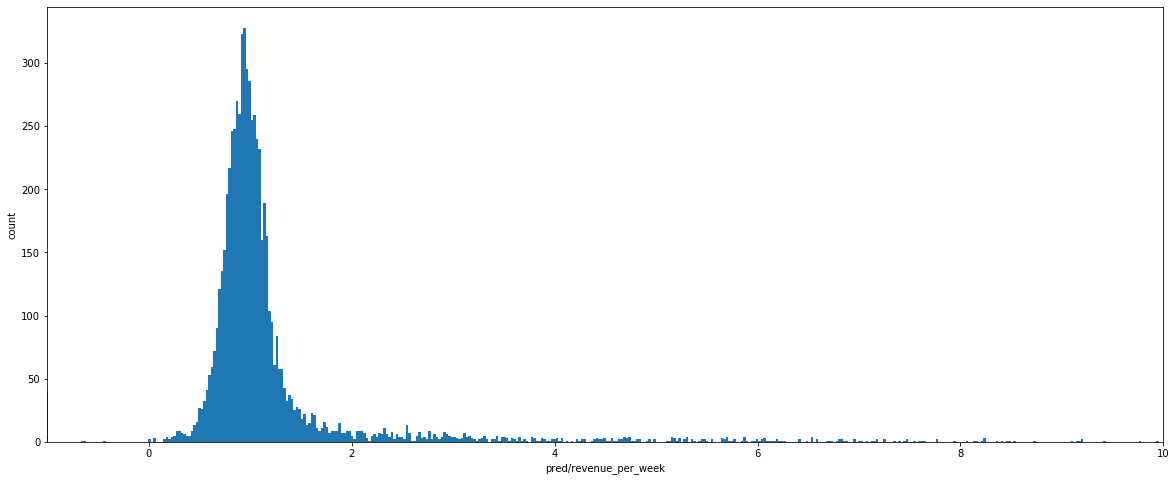

In [111]:
plt.figure(figsize=(20,8))
plt.hist(rev_ratio, bins=2000)
plt.xlim(-1,10)
plt.ylabel("count")
plt.xlabel("pred/revenue_per_week")

Text(0.5, 0, 'revenue error')

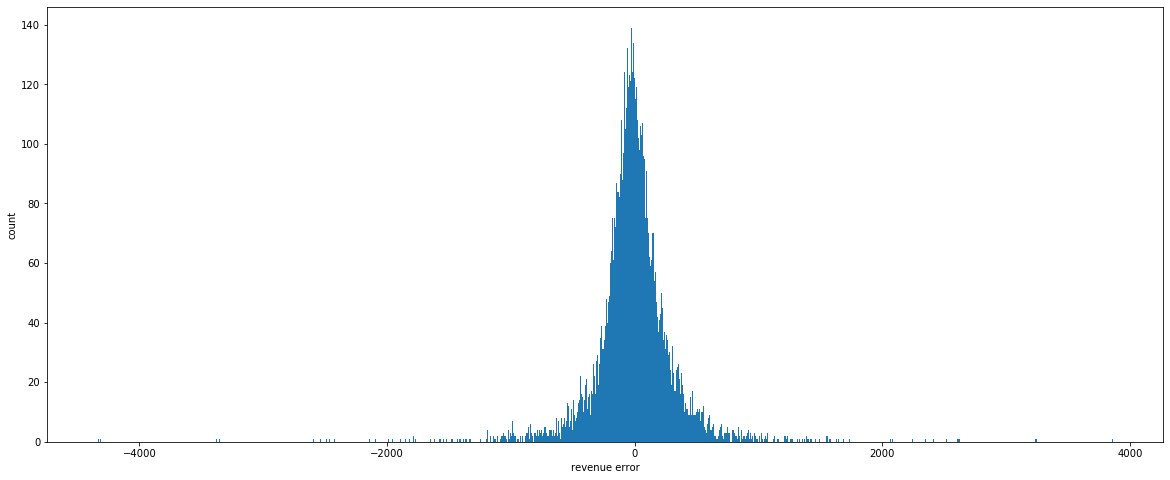

In [112]:
plt.figure(figsize=(20,8))
plt.hist(test["revenue_error"], bins=1000)
# plt.xlim(-1,10)
plt.ylabel("count")
plt.xlabel("revenue error")

In [113]:
feature_importance_df_revenue = pd.DataFrame(tuple(zip(test_X.columns,revenue_model.feature_importances_)), columns={"importance", "features"})

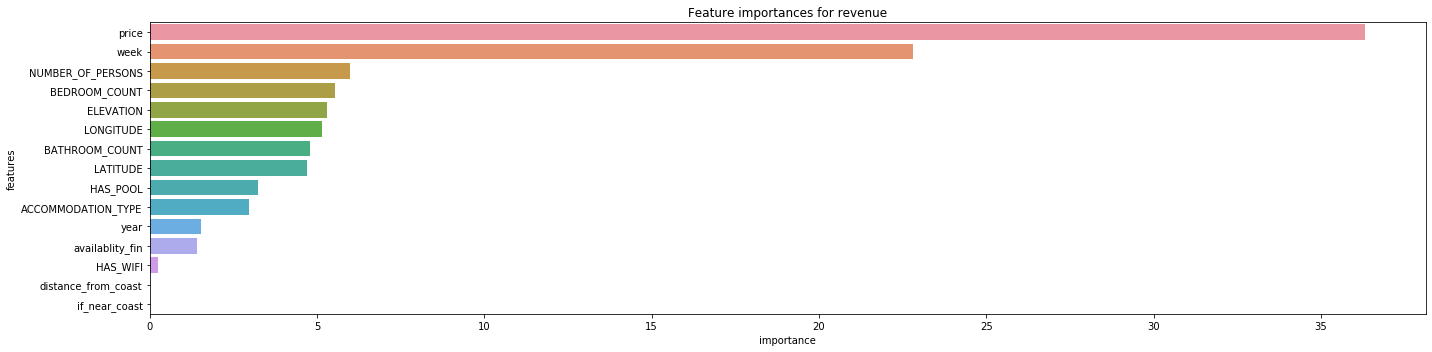

In [114]:
# feature_importance_df_revenue.sort_values(by="features")
plt.figure(figsize=(20,5))
sns.barplot(x="importance",
            y="features",
            data=feature_importance_df_revenue.sort_values(by="importance",
                                           ascending=False))
plt.title('Feature importances for revenue')
plt.tight_layout()

## OCCUPANCY PER WEEK

In [115]:
occupancy_model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=2000,
    depth=10,
    random_seed=42,
    logging_level='Silent'
)

In [116]:
occupancy_model.fit(
    X_train, y_train["occupancy"],
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation["occupancy"]),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [328]:
cv_occ_params = occupancy_model.get_params()
cv_data = cv(
    Pool(train_X, train_Y["occupancy"], cat_features=categorical_features_indices),
    cv_occ_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [329]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmax(cv_data['test-RMSE-mean'])
))

Best validation accuracy score: 0.29±0.00 on step 0


C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [330]:
print('Precise validation accuracy score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation accuracy score: 0.28572073283269506


In [117]:
occupancy_predictions = occupancy_model.predict(test_X)

In [118]:
occupancy_predictions.mean()

0.9058084588318488

In [119]:
test["predicted_occupancy"] = occupancy_predictions

In [120]:
test["occupancy_error"] = test["predicted_occupancy"]-test_Y["occupancy"]

In [121]:
occupancy_ratio = np.array([])

In [122]:
for i, ele in enumerate(occupancy_predictions):
    if test["occupancy"].values[i] != 0:
        occupancy_ratio = np.append(occupancy_ratio, ele/test_Y["occupancy"].values[i])
    else:
        occupancy_ratio = np.append(occupancy_ratio, -1)

In [123]:
len(occupancy_ratio)

6575

Text(0.5, 0, 'pred_occupancy/occupancy_per_week')

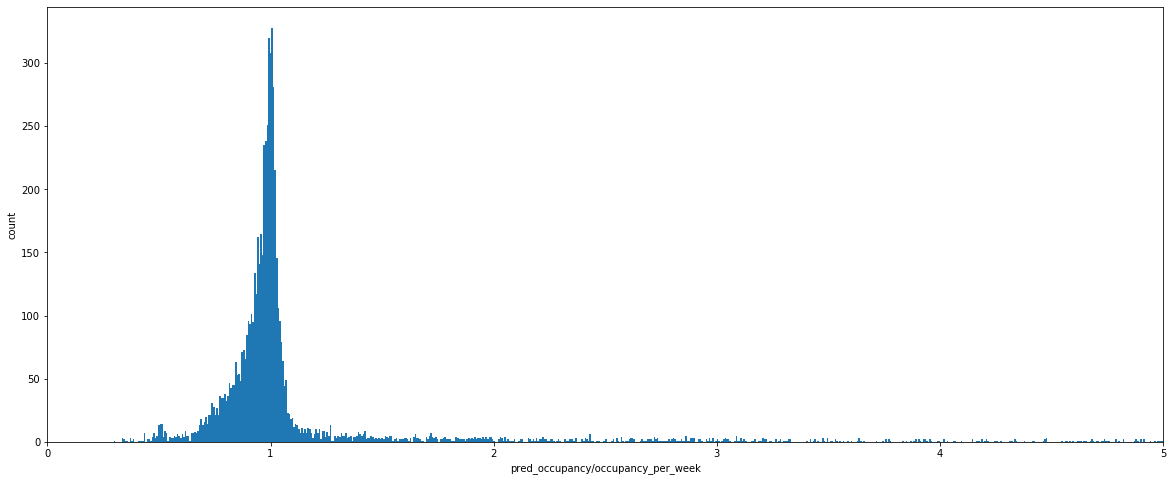

In [124]:
plt.figure(figsize=(20,8))
plt.hist(occupancy_ratio, bins=1000)
plt.xlim(0,5)
plt.ylabel("count")
plt.xlabel("pred_occupancy/occupancy_per_week")

In [125]:
feature_importance_df_occupancy = pd.DataFrame(tuple(zip(test_X.columns,occupancy_model.feature_importances_)), columns={"importance", "features"})

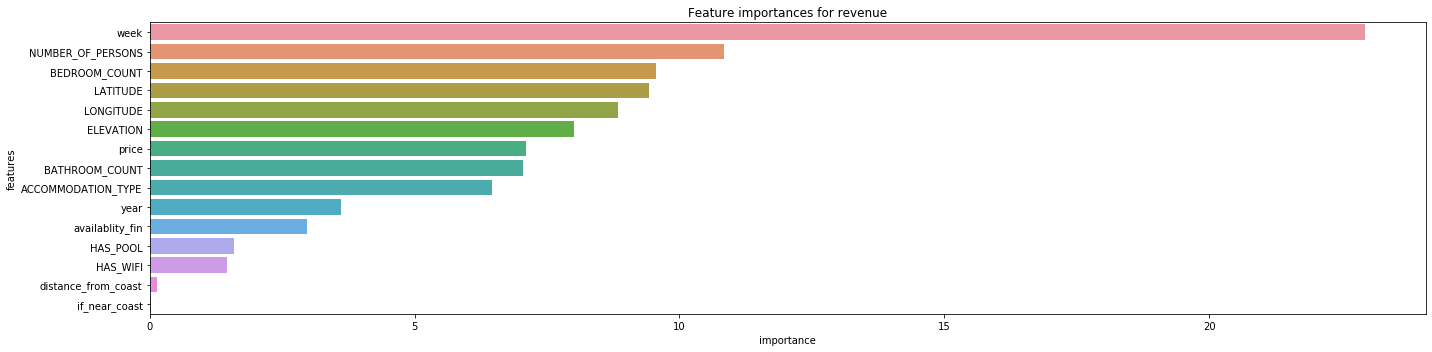

In [126]:
# feature_importance_df_revenue.sort_values(by="features")
plt.figure(figsize=(20,5))
sns.barplot(x="importance",
            y="features",
            data=feature_importance_df_occupancy.sort_values(by="importance",
                                           ascending=False))
plt.title('Feature importances for revenue')
plt.tight_layout()

In [54]:
test

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
0,DE-54552-17,1,2019,1.0,516.900000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,335.091986,-181.808014,0.648272,0.729199,-0.270801
1,DE-54552-17,2,2019,1.0,415.000000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,168.395132,-246.604868,0.405771,0.405347,-0.594653
2,DE-54552-17,5,2019,1.0,457.700000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,171.958010,-285.741990,0.375700,0.396999,-0.603001
3,DE-54552-17,7,2019,1.0,457.700000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,195.505175,-262.194825,0.427147,0.379907,-0.620093
4,DE-54552-17,9,2019,1.0,495.920000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,178.389076,-317.530924,0.359713,0.411593,-0.588407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,DE-00022-62,37,2018,1.0,97.906667,7.0,1.000000,1,Apartment,8,...,1.0,0.000,40.000,51.000,0.0,173.888980,75.982313,1.776069,0.557516,-0.442484
12146,DE-00022-62,38,2018,1.0,27.973333,2.0,0.285714,1,Apartment,8,...,1.0,0.000,40.000,51.000,0.0,141.958850,113.985517,5.074792,0.558762,0.273048
12147,DE-96132-01,41,2018,1.0,283.700000,5.0,0.714286,2,Holiday home,4,...,4.0,1.000,29.000,11.000,0.0,329.538275,45.838275,1.161573,0.938145,0.223859
12148,DE-00027-45,42,2019,1.0,237.000000,3.0,0.428571,2,Holiday home,4,...,1.0,0.000,9.286,48.000,0.0,417.978180,180.978180,1.763621,0.757031,0.328460


In [127]:
week_wise_revenue = test.groupby(["week"]).mean()

In [128]:
week_wise_revenue

,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
week,,,,,,,,,,,,,,,,,,,,,
1,2019.000000,1.000028,1412.626936,6.555556,0.936508,2.222222,7.388889,4.583333,2.777778,0.722222,...,22.750000,NaN,NaN,NaN,NaN,1208.004372,-204.622564,1.017419,0.830800,-0.105708
2,2019.000000,1.000000,339.600238,2.600000,0.371429,2.000000,6.000000,3.600000,2.400000,0.800000,...,21.600000,NaN,NaN,NaN,NaN,663.500816,323.900578,2.259934,0.668298,0.296870
3,2018.875000,1.000000,770.405379,5.875000,0.839286,1.750000,6.750000,2.875000,1.375000,0.875000,...,12.750000,NaN,NaN,NaN,NaN,627.878786,-142.526593,0.795296,0.666296,-0.172990
4,2018.875000,1.000000,654.410841,4.875000,0.696429,1.875000,6.375000,3.500000,1.750000,1.000000,...,17.250000,NaN,NaN,NaN,NaN,715.676305,61.265464,1.341743,0.717983,0.021555
5,2018.800000,1.000000,734.047833,4.900000,0.700000,2.000000,6.900000,4.000000,2.900000,0.900000,...,21.900000,NaN,NaN,NaN,NaN,934.053731,200.005897,1.630307,0.758916,0.058916
6,2018.818182,0.987000,604.184697,4.454545,0.636364,2.545455,6.636364,3.272727,1.545455,0.636364,...,21.818182,NaN,NaN,NaN,NaN,655.092525,50.907828,1.882216,0.708196,0.071832
7,2018.615385,0.934077,671.258567,5.000000,0.714286,2.423077,6.923077,3.307692,1.576923,0.615385,...,23.769231,NaN,NaN,NaN,NaN,712.300245,41.041678,1.269396,0.729896,0.015610
8,2018.666667,0.910750,850.397066,4.375000,0.625000,2.416667,7.541667,3.875000,2.166667,0.708333,...,24.375000,NaN,NaN,NaN,NaN,931.234091,80.837025,1.334990,0.728093,0.103093
9,2018.730769,0.961538,806.568476,5.346154,0.763736,2.230769,6.538462,3.076923,1.653846,0.653846,...,24.076923,NaN,NaN,NaN,NaN,673.133466,-133.435010,1.104056,0.757723,-0.006014


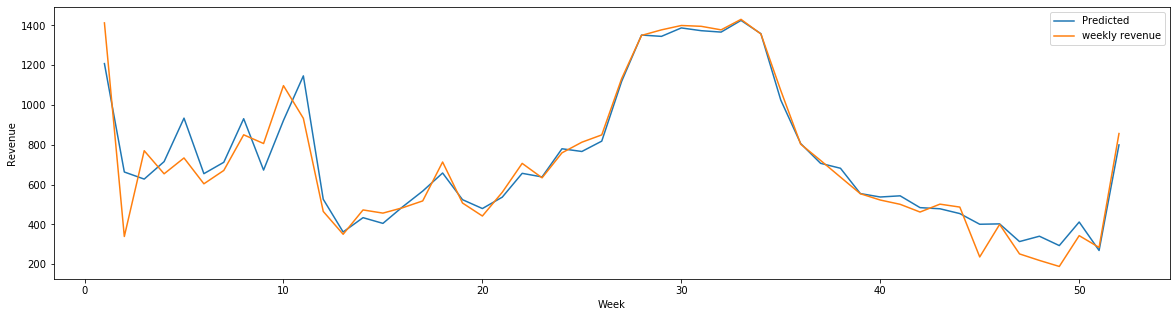

In [129]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_revenue, label="Predicted")
plt.plot(week_wise_revenue.index, week_wise_revenue.revenue, label="weekly revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.show()

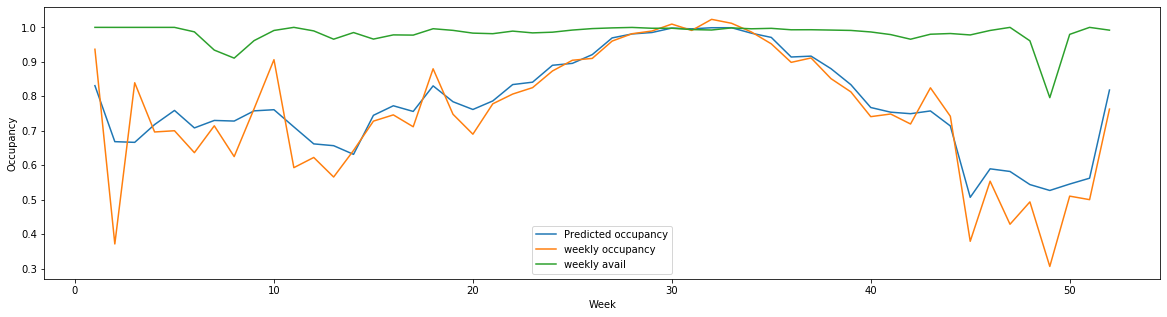

In [130]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_occupancy, label="Predicted occupancy")
plt.plot(week_wise_revenue.index, week_wise_revenue.occupancy, label="weekly occupancy")
plt.plot(week_wise_revenue.index, week_wise_revenue.availablity_fin, label="weekly avail")
plt.xlabel("Week")
plt.ylabel("Occupancy")
plt.legend()
plt.show()

In [65]:
props = pd.DataFrame([(i,2019,1,2,3,1,1,1,0,47.9035,8.362312,841.0,0,-999,34.53)for i in range(1,53)], columns=features)
# prop = pd.DataFrame([(2,2019,1,2,3,1,1,1,0,47.9035,8.362312,841.0,0,-999,34.53)], columns=features)

In [67]:
x = revenue_model.predict(props)

In [68]:
x

array([331.03932149, 191.66230296, 184.75837562, 196.51321977,
       190.20301959, 258.95777836, 270.69266906, 273.68909022,
       289.40288977, 248.53328296, 191.60180403, 188.9119973 ,
       202.19711339, 207.05313982, 212.05756247, 210.9480687 ,
       231.12280299, 267.02386106, 215.81443922, 217.98542539,
       230.1177668 , 262.17489042, 246.72303638, 269.15518918,
       289.87421469, 289.66242131, 313.71073556, 344.79509   ,
       376.01964138, 378.95445577, 378.73443324, 374.68412178,
       375.24851695, 365.4229002 , 334.39242783, 301.65061075,
       238.66583154, 245.90469087, 235.85884361, 242.79383204,
       241.09980555, 263.56463503, 257.85245507, 217.10682501,
       189.25505975, 193.99826309, 192.20379038, 188.12132343,
       183.387469  , 184.06430691, 168.8465007 , 274.62992956])

In [132]:
import math
math.sqrt((test["occupancy_error"]**2).mean())

0.24425548924973706

In [147]:
train[train["occupancy"]==0]

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
